<a href="https://colab.research.google.com/github/safaltasaxena/deep-learning-mini-projects/blob/main/handwritten-digit-recognition-ann/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEEP LEARNING-

recognizing hand written digits


(28*28 pixels and no hidden layers)

In [ ]:
import tensorflow as tf
from tensorflow import keras
#using keras for convinient API
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#scaling the dataset for more accuracy
x_train=x_train/255
x_test=x_test/255
#as maxm no in greyscale is 255 so to put 0-1 range preprocessing needs to be
#done like this.

In [ ]:
x_train[0].shape
#represents the 28*28 pixel

(28, 28)

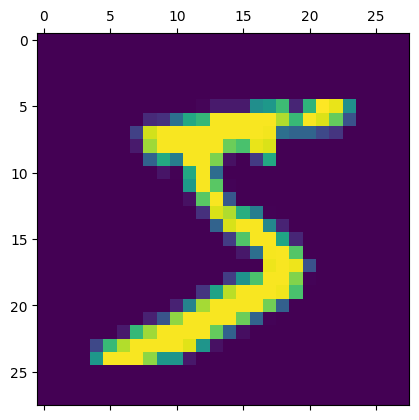

In [ ]:
plt.matshow(x_train[0])
#to see 2d array form use x_train[0]

In [ ]:
y_train[0]

np.uint8(5)

flattening our dataset to fit in neurons

In [ ]:
x_trained_flattend=x_train.reshape(len(x_train),28*28)
x_test_flattend=x_test.reshape(len(x_test),28*28)
x_trained_flattend.shape
#earlier it was (60000,28,28)

(60000, 784)

now we will create a simple neural network.

In [ ]:
#sequential means having stack of layers in my neural network,and since it is a
#stack it will accept every layer as one element.

model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])                     #op,ip,shapes

#keras has this api in which we use dense that means ine one layer all neurons
#are connected to 2nd layer.

#in tensorflow keras we always need to compile stuff and u pass bunch of arg.

model.compile(
    optimizer='adam',
    #optimizer allows u to train efficiently,when backward propagation is going
    #on this allows u to reach to global optima in a efficient way.
    loss='sparse_categorical_crossentropy',
    #sparse is for numeric op and categorical since we have like 10 categories
    metrics=['accuracy']
    #when my NN is compiling my goal is to make it more accurate.
)

model.fit(x_trained_flattend,y_train,epochs=5)
#epochs is no. of ite our NN is going to run
#now we see after each ite accuracy tends to increase

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8206 - loss: 0.7093
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9129 - loss: 0.3130
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9207 - loss: 0.2860
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9221 - loss: 0.2732
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9262 - loss: 0.2605


this was accuracy on training data set now we will check it on testing dataset

In [ ]:
model.evaluate(x_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9115 - loss: 0.3092


[0.2740135192871094, 0.921999990940094]

now predicting using model

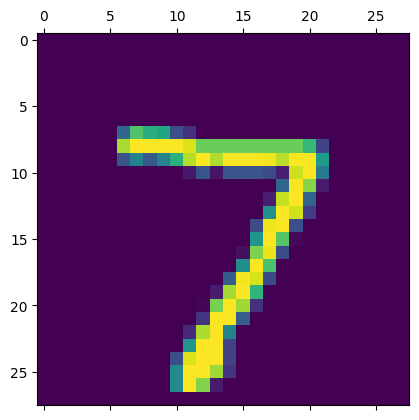

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_predicted = model.predict(x_test_flattend)
y_predicted[0]
#so now for each 0-9 it showed how much percentage so we gotta find max for that
#we use numpy fnc that returns index of maxm value
np.argmax(y_predicted[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


np.int64(7)

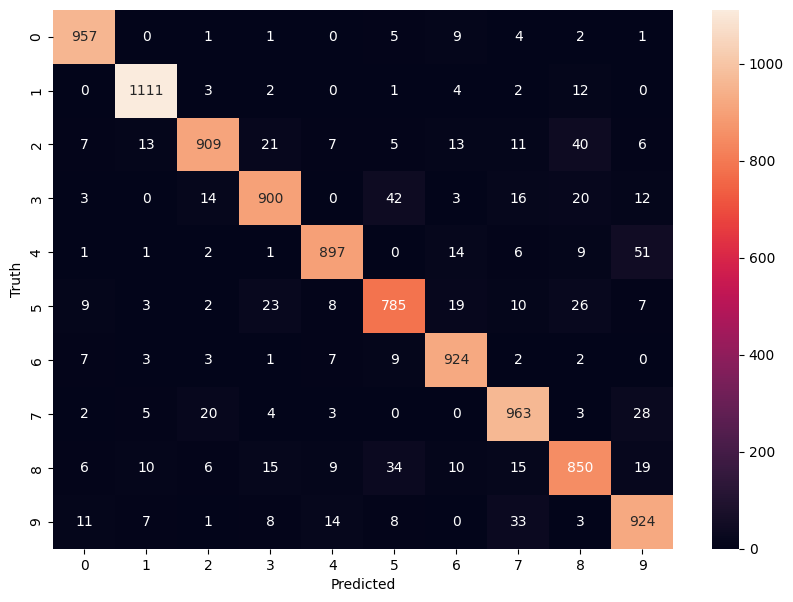

In [ ]:
y_pred_classes = np.argmax(y_predicted, axis=1)
cm = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()
#converting tf to np cz heatmap takes np
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

now we will add a hidden layer and imporve its efficiency

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    #use op neurons from trial error but less then inpiut neurons
    #using relu activation fnc here
    keras.layers.Dense(10,activation='sigmoid')
    #for final layer we dont need to provide ip as it knows alr that it has to
    #take it from prev layer.
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_trained_flattend,y_train,epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8702 - loss: 0.4617
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9593 - loss: 0.1401
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9753 - loss: 0.0866
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9795 - loss: 0.0682
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9852 - loss: 0.0486


In [ ]:
model.evaluate(x_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9675 - loss: 0.1026


[0.08759497106075287, 0.9715999960899353]

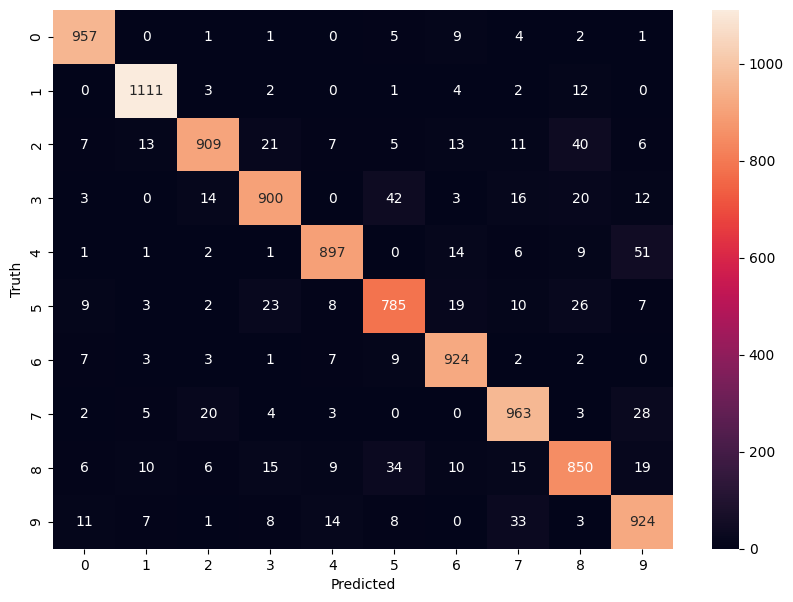

In [ ]:
y_pred_classes = np.argmax(y_predicted, axis=1)
cm = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
!rm -rf logs/
#clearing cache logs

In [ ]:
#if u dont wanna flatten ur x dataset then
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),#u dont need tro provide ip then
    keras.layers.Dense(10,activation='sigmoid')
])

#Tensorboard code
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs.adam/", histogram_freq=1, write_graph=True)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    run_eagerly=False
    #to get graph
)
#all of the values inside compile are known as hyperparameteres that controls the parameters weights and bias so that diff things like accuracy changes.
model.fit(x_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8729 - loss: 0.4514
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9612 - loss: 0.1337
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9729 - loss: 0.0903
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9803 - loss: 0.0671
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9839 - loss: 0.0514
